<a href="https://colab.research.google.com/github/Nahrawen/handwritten/blob/main/tp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importer la fonction drive de la bibliothèque google.colab pour monter Google Drive
from google.colab import drive
# Monter Google Drive et spécifier le répertoire de montage comme '/content/drive'
drive.mount('/content/drive')


Mounted at /content/drive


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


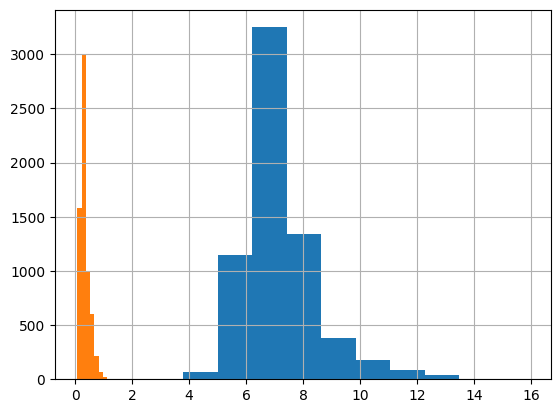

In [2]:
# Importer la bibliothèque pandas sous l'alias 'pd' pour faciliter l'utilisation
import pandas as pd
# Lire le fichier CSV contenant les données sur la qualité des vins depuis Google Drive et le stocker dans un DataFrame nommé 'df'
df=pd.read_csv('/content/drive/MyDrive/wines-quality.csv')
# Afficher les noms des colonnes du DataFrame pour vérifier les données chargées
print(df.columns)
# Afficher les premières lignes du DataFrame pour une inspection initiale des données
df.head()
# Afficher l'histogramme de la colonne 'fixed_acidity' pour visualiser sa distribution
df.fixed_acidity.hist()
# Afficher l'histogramme de la colonne 'volatile_acidity' pour visualiser sa distribution
df.volatile_acidity.hist()
# Afficher les dix premières lignes du DataFrame pour une inspection détaillée
df.head(10)

<Axes: >

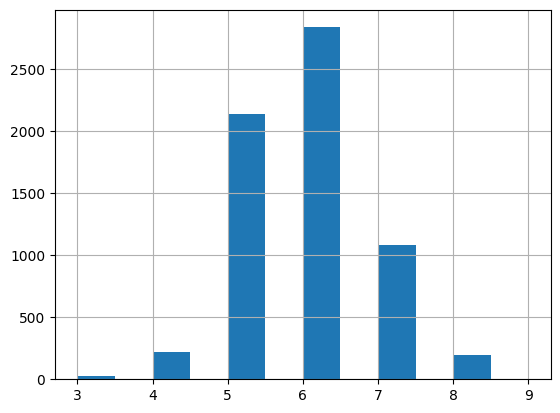

In [3]:
# Importer la bibliothèque matplotlib.pyplot sous l'alias 'plt' pour tracer des graphiques
import matplotlib.pyplot as plt
# Utiliser la commande magique '%matplotlib inline' pour afficher les graphiques directement dans le notebook
%matplotlib inline
# Tracer un histogramme de la colonne 'quality' du DataFrame 'df' avec 12 intervalles (bins) pour visualiser sa distribution
df.quality.hist(bins=12)

In [4]:
# Importer la fonction train_test_split de la bibliothèque sklearn.model_selection
from sklearn.model_selection import train_test_split
# Séparer les features (X) de la cible (y) en supprimant la colonne "quality" du DataFrame 'df' pour les features
X=df.drop("quality", axis=1)
y=df["quality"]
# Diviser les données en ensembles d'entraînement et de test, avec une taille de test de 50% (test_size=0.5)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.5)
# Afficher la forme (nombre de lignes et de colonnes) des ensembles d'entraînement et de test
X_train.shape, X_test.shape



((3248, 12), (3249, 12))

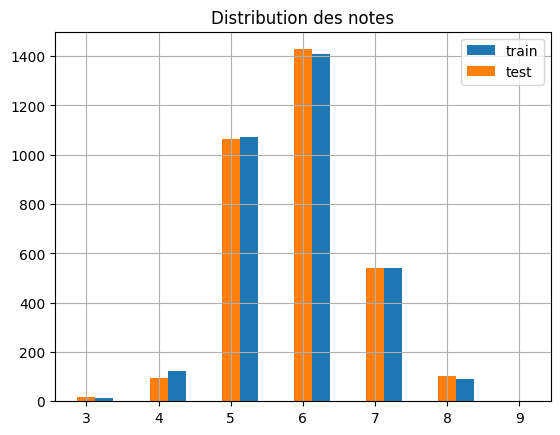

In [5]:
# Tracer un histogramme des valeurs de la cible (notes de qualité des vins) pour l'ensemble d'entraînement
# en spécifiant 24 intervalles (bins), et en alignant les bords des barres à droite
ax=y_train.hist(bins=24, label="train", align="right")
y_test.hist(bins=24, label="test", ax=ax, align="left")
ax.set_title("Distribution des notes")
ax.legend();

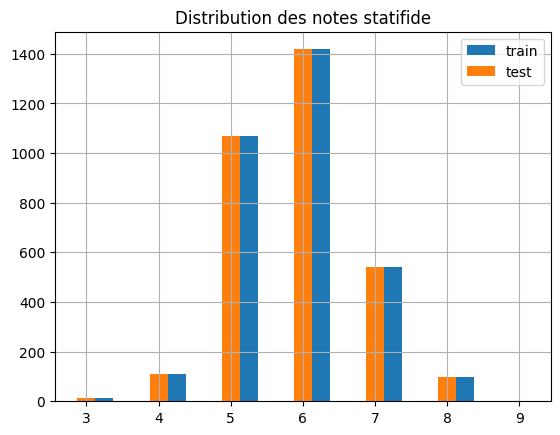

In [6]:
# Diviser les données en ensembles d'entraînement et de test en maintenant la distribution des classes de la cible (y)
# Le paramètre 'stratify=y' assure que la répartition des classes dans y est conservée lors de la division
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, test_size=0.5)
X_train.shape, X_test.shape
# Tracer un histogramme des valeurs de la cible (notes de qualité des vins) pour l'ensemble d'entraînement
# en spécifiant 24 intervalles (bins), et en alignant les bords des barres à droite
ax=y_train.hist(bins=24, label="train", align="right")
y_test.hist(bins=24, label="test", ax=ax, align="left")
ax.set_title("Distribution des notes statifide")
# Ajouter une légende au graphique pour indiquer quelle distribution correspond à l'ensemble d'entraînement et à l'ensemble de test
ax.legend();

In [7]:
# Afficher les types de données de chaque colonne dans le DataFrame 'df'
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

In [8]:
# Afficher les valeurs uniques de la colonne 'color' dans le DataFrame 'df'
df.color.unique()

array(['red', 'white'], dtype=object)

In [9]:
# Ajouter une nouvelle colonne 'color' à DataFrame 'df' en utilisant la méthode 'apply' sur la colonne existante 'color'
# La fonction lambda est appliquée à chaque valeur de la colonne 'color' pour assigner une valeur numérique (0 ou 1) en fonction de la condition
# Si la valeur de 'color' est 'red', la valeur de la nouvelle colonne 'color' est 0, sinon elle est 1
df['color']=df.color.apply(lambda x:0 if x=='red' else 1)

In [10]:
from sklearn.model_selection import train_test_split
x=df.drop('quality',axis=1)
y=df["quality"]
# Diviser les données en ensembles d'entraînement et de test, avec une taille de test de 20% (test_size=0.2)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape

((5197, 12), (1300, 12))

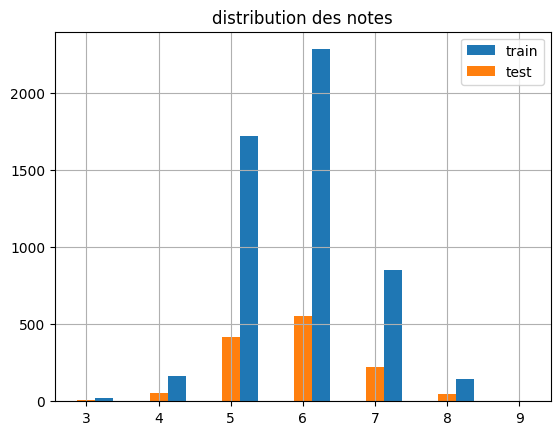

In [11]:
# Tracer un histogramme des valeurs de la cible (notes de qualité des vins) pour l'ensemble d'entraînement
# en spécifiant 24 intervalles (bins), et en alignant les bords des barres à droite
ax=y_train.hist(bins=24,label="train",align="right")
y_test.hist(bins=24,label="test",ax=ax,align="left")
ax.set_title("distribution des notes")
ax.legend();

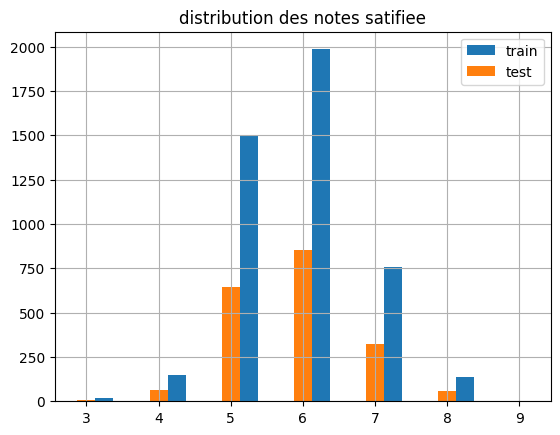

In [12]:
# Diviser les données en ensembles d'entraînement et de test, tout en maintenant la distribution des classes de la cible (y)
# Le paramètre 'stratify=y' assure que la répartition des classes dans y est conservée lors de la division
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.3)
x_train.shape,x_test.shape
ax=y_train.hist(bins=24,label="train",align="right")
y_test.hist(bins=24,label="test",ax=ax,align="left")
ax.set_title("distribution des notes satifiee")
ax.legend();

In [13]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                     int64
dtype: object

In [14]:
x=df.drop("quality",axis=1)
y=df["quality"]
# Diviser les données en ensembles d'entraînement et de test, tout en maintenant la distribution des classes de la cible (y)
# Le paramètre 'stratify=y' assure que la répartition des classes dans y est conservée lors de la division
# La taille de l'ensemble de test est fixée à 30% (test_size=0.3) des données totales
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=0.3)

In [15]:
# Importer la classe LogisticRegression de la bibliothèque sklearn.linear_model
from sklearn.linear_model import LogisticRegression
# Instancier un objet de la classe LogisticRegression
lr=LogisticRegression()
# Entraîner le modèle de régression logistique sur l'ensemble d'entraînement
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
# Faire des prédictions sur les cinq premiers exemples de l'ensemble de test
lr.predict(x_test[:5])

array([6, 6, 6, 5, 5])

In [17]:
# Importer la classe LinearRegression de la bibliothèque sklearn.linear_model
from sklearn.linear_model import LinearRegression
# Instancier un objet de la classe LinearRegression
lr=LinearRegression()
# Entraîner le modèle de régression linéaire sur l'ensemble d'entraînement
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
# Faire des prédictions sur un sous-ensemble de l'ensemble de test, par exemple, les exemples de 5 à 29
lr.predict(x_test[5:30])


array([6.3225759 , 5.02380591, 6.75190136, 5.91921565, 6.05607359,
       6.85139821, 5.83757011, 6.25391708, 5.29718009, 6.45973582,
       5.32687502, 5.11692708, 5.70793403, 5.8826669 , 5.78044783,
       5.79388506, 5.9911436 , 6.33294976, 5.91858784, 6.03692141,
       6.27308996, 5.84847027, 5.31869435, 7.00298699, 5.62019088])

In [19]:
# Importer la classe Perceptron de la bibliothèque sklearn.linear_model
from sklearn.linear_model import Perceptron
# Instancier un objet de la classe Perceptron
lr=Perceptron()
# Entraîner le modèle Perceptron sur l'ensemble d'entraînement
lr.fit(x_train,y_train)

Perceptron()

In [20]:
# Faire des prédictions sur les cinq premiers exemples de l'ensemble de test
lr.predict(x_test[:5])

array([5, 5, 6, 5, 5])

In [21]:
from sklearn.linear_model import LogisticRegression
# Instancier un objet de la classe LogisticRegression avec une spécification de max_iter=1000
lr=LogisticRegression(max_iter=1000)
# Entraîner le modèle de régression logistique sur l'ensemble d'entraînement
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [22]:
lr.predict(x_test[:5])

array([5, 6, 6, 6, 6])

In [23]:
from sklearn.metrics import classification_report
# Faire des prédictions sur l'ensemble de test avec le modèle de régression logistique entraîné
y_pred=lr.predict(x_test)
# Afficher un rapport de classification pour évaluer les performances du modèle
# Le rapport de classification inclut des métriques telles que la précision, le rappel et le score F1 pour chaque classe, ainsi que la moyenne globale
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        65
           5       0.60      0.60      0.60       642
           6       0.52      0.73      0.60       851
           7       0.46      0.16      0.23       324
           8       0.00      0.00      0.00        58
           9       0.00      0.00      0.00         1

    accuracy                           0.54      1950
   macro avg       0.22      0.21      0.21      1950
weighted avg       0.50      0.54      0.50      1950



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from sklearn.linear_model import LogisticRegression
# Réinitialiser le modèle de régression logistique avec un paramètre max_iter réduit à 100
lr=LogisticRegression(max_iter=100)
# Entraîner à nouveau le modèle de régression logistique sur l'ensemble d'entraînement
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
from sklearn.metrics import classification_report
# Faire des prédictions sur l'ensemble de test avec le modèle de régression logistique entraîné
y_pred=lr.predict(x_test)
# Afficher un rapport de classification pour évaluer les performances du modèle
# Le rapport de classification inclut des métriques telles que la précision, le rappel et le score F1 pour chaque classe, ainsi que la moyenne globale
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        65
           5       0.49      0.42      0.45       642
           6       0.47      0.76      0.58       851
           7       0.62      0.02      0.03       324
           8       0.00      0.00      0.00        58
           9       0.00      0.00      0.00         1

    accuracy                           0.47      1950
   macro avg       0.23      0.17      0.15      1950
weighted avg       0.47      0.47      0.41      1950



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
